# Isolation Forest
- [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) determines the outliers in a data.
- It returns -1 for outliers and 1 for inliers.

## Method
1. For each split, a random feature is chosen, and a value between the feature's minimum and maximum is selected.
   
2. This process is recursively applied to split all the samples.
   
3. The average number of splits required to isolate a sample, across an ensemble of trees, is called the normality measure.

4. Outliers require fewer splits to be isolated, so their normality measure is smaller compared to inliers.

## Example

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

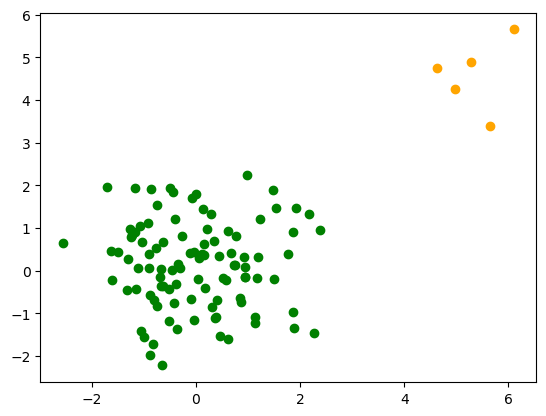

In [2]:
np.random.seed(0)
data1 = np.random.normal(size=(100,2)) 
data2 = np.random.normal(loc=5, size=(5,2)) 

plt.scatter(data1[:,0], data1[:,1], c='g')
plt.scatter(data2[:,0], data2[:,1], c='orange');

In [3]:
X = np.vstack([data1, data2])
X.shape

(105, 2)

In [4]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0)
clf.fit(X)

IsolationForest(random_state=0)

In [5]:
predictions = clf.predict(X)

In [6]:
from collections import Counter
Counter(predictions)

Counter({1: 86, -1: 19})

In [7]:
inliers = X[predictions == 1]
outliers = X[predictions == -1]

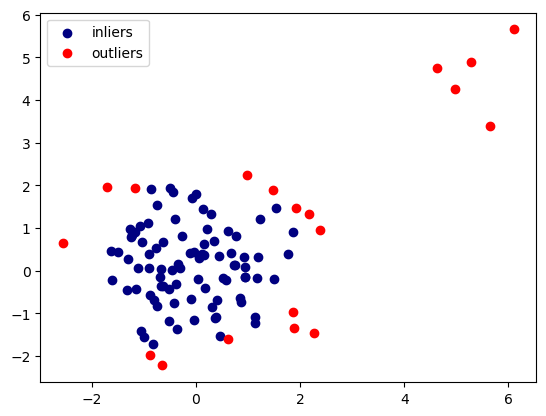

In [8]:
plt.scatter(inliers[:,0],  inliers[:,1], c='navy', label='inliers')
plt.scatter(outliers[:,0], outliers[:,1], c='red', label='outliers')
plt.legend();

In [11]:
# Average anomaly score of X of the base classifiers.
clf.decision_function(X)

array([ 0.02312107, -0.07530189, -0.00456119,  0.08818199,  0.10160557,
        0.03584609,  0.09932992,  0.10090331,  0.02923225,  0.06804123,
       -0.13577388,  0.06699841, -0.0833435 ,  0.10420727,  0.01350973,
        0.10994401, -0.04227785,  0.10242173,  0.0264283 ,  0.10040098,
        0.0151073 , -0.0670491 ,  0.099482  ,  0.08273729,  0.0265511 ,
        0.10860788,  0.05392592,  0.10279865,  0.1061506 ,  0.10184561,
        0.10456211,  0.00265429,  0.08428358,  0.05317393,  0.10700338,
        0.09905358,  0.01340571,  0.07944365,  0.0883821 ,  0.09969933,
        0.08251061,  0.00280412, -0.02215977,  0.05953927,  0.06230175,
        0.05684366,  0.07385389,  0.08762826,  0.02967877,  0.11119139,
       -0.0279606 ,  0.0631309 , -0.0028059 ,  0.08704871, -0.00195314,
        0.02053852,  0.01973971,  0.08760846,  0.08791454,  0.07102515,
        0.05769716,  0.03604464,  0.11005366,  0.02451027,  0.09327784,
        0.10999299,  0.10801372,  0.09913288,  0.08961188,  0.05

In [13]:
df = pd.DataFrame()
df['Decision Function'] = clf.decision_function(X)
df['Predictions'] = clf.predict(X)
df.head()

,Decision Function,Predictions
0,0.023121,1
1,-0.075302,-1
2,-0.004561,-1
3,0.088182,1
4,0.101606,1


In [16]:
df.sort_values('Decision Function').head(len(outliers))

,Decision Function,Predictions
101,-0.265211,-1
102,-0.211994,-1
100,-0.183749,-1
104,-0.175955,-1
103,-0.166222,-1
10,-0.135774,-1
12,-0.083344,-1
91,-0.077279,-1
1,-0.075302,-1
72,-0.067121,-1


In [18]:
df.sort_values('Decision Function').tail(len(inliers))

,Decision Function,Predictions
31,0.002654,1
41,0.002804,1
36,0.013406,1
14,0.013510,1
20,0.015107,1
...,...,...
25,0.108608,1
15,0.109944,1
65,0.109993,1
62,0.110054,1
